In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
def myDTFS(x):
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(len(x))
    N = len(x)
    for k in np.arange(0,len(x)):
        tmpVal = 0.0
        Omega[k] = (2*np.pi/N)*k
        for n in np.arange(0,len(x)):
            tmpVal = tmpVal + x[n]*np.exp(-1j*Omega[k]*n)
        X[k] = tmpVal/N
    return (X,Omega)

def myIDTFS(X):
    x = np.zeros(len(X), dtype=float)
    N = len(x)
    for n in np.arange(0,len(x)):
        tmpVal = 0.0
        for k in np.arange(0,len(X)):
            tmpVal = tmpVal + X[k]*np.exp(+1j*(2*np.pi/N)*k*n)
        x[n] = np.absolute(tmpVal)
    return (x)

In [4]:
def myDFT(x):
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(len(x))
    N = len(x)
    for k in np.arange(0,len(x)):
        tmpVal = 0.0
        Omega[k] = (2*np.pi/N)*k
        for n in np.arange(0,len(x)):
            tmpVal = tmpVal + x[n]*np.exp(-1j*Omega[k]*n)
        X[k] = tmpVal
    return (X,Omega)

def myIDFT(X):
    x = np.zeros(len(X), dtype=float)
    N = len(x)
    for n in np.arange(0,len(x)):
        tmpVal = 0.0
        for k in np.arange(0,len(X)):
            tmpVal = tmpVal + X[k]*np.exp(+1j*(2*np.pi/N)*k*n)
        x[n] = np.absolute(tmpVal) / N
    return (x)

### Question 2

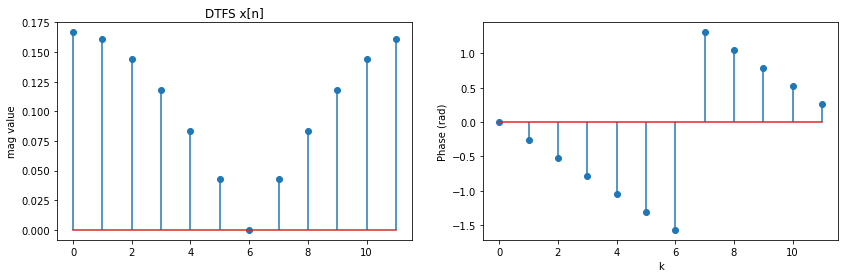

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


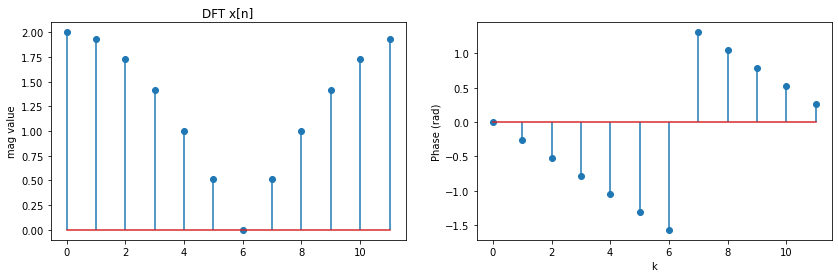

IDTFS: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDFT: [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
def q1_b_c(x, mode):
    # (X) = np.fft.fft(x)
    
    (X1, Omega) = myDTFS(x)  
    absX = np.absolute(X1)
    angleX = np.angle(X1)
    titleStr = 'x[n]'

    if "dtfs" in mode:
        f, axarr = plt.subplots(1,2, sharex=True, figsize=(14,4))
        axarr[0].stem(np.arange(0,len(X1)), absX)
        axarr[0].set_title('DTFS '+titleStr)
        axarr[0].set_ylabel('mag value')

        axarr[1].stem(np.arange(0,len(X1)), angleX)
        axarr[1].set_xlabel('k')
        axarr[1].set_ylabel('Phase (rad)')
        plt.show()
        
    (X2, Omega) = myDFT(x)
    absX2 = np.absolute(X2)
    angleX2 = np.angle(X2)
    print(x)
    titleStr = 'x[n]'
    
    if "dft" in mode:
        f, axarr = plt.subplots(1,2, sharex=True, figsize=(14,4))
        axarr[0].stem(np.arange(0,len(X2)), absX2)
        axarr[0].set_title('DFT '+titleStr)
        axarr[0].set_ylabel('mag value')

        axarr[1].stem(np.arange(0,len(X2)), angleX2)
        axarr[1].set_xlabel('k')
        axarr[1].set_ylabel('Phase (rad)')
        plt.show()
    
    print("IDTFS:", np.round(myIDTFS(X1)))
    print("IDFT:", np.round(myIDFT(X2)))
    
    if "dtft" in mode:
        f, axarr = plt.subplots(1, 2, sharex=True, figsize=(14,4))
        axarr[0].stem(Omega, absX*(2*np.pi),'C0x')
        axarr[0].set_title('DTFT of '+titleStr)
        axarr[0].set_ylabel('mag value')
        plt.xticks(np.arange(0, 2*np.pi, step=0.5))

        axarr[1].stem(Omega, angleX)
        axarr[1].set_xlabel('omega (rad/sample)')
        axarr[1].set_ylabel('Phase (rad)')
        plt.show()


q1_b_c([1,1,0,0,0,0,0,0,0,0,0,0], "dtfs,dft")

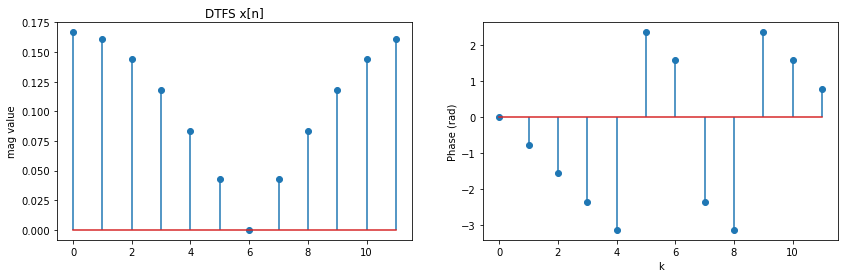

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
IDTFS: [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDFT: [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


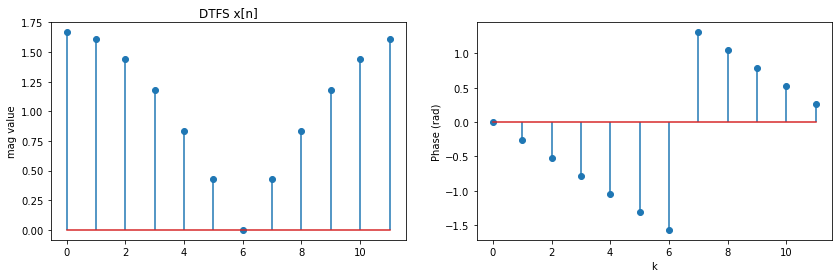

[10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
IDTFS: [10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
IDFT: [10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [33]:
def q1_d():
    q1_b_c([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], "dtfs")
    q1_b_c([10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "dtfs")

q1_d()

## Question 3

In [5]:
def plotK(W):
    f, axarr = plt.subplots()
    phaseW = np.angle(W)
    print(phaseW)
    axarr.stem(np.arange(0,len(phaseW)),phaseW)
    plt.show()

def myMatrixDFT(x):
    N = len(x)
    X = np.zeros(len(x), dtype=complex)
    Omega = np.zeros(N)
    W = [[round(np.exp(-1j*2*np.pi*k*n/N),3) for n in range(N)] for k in range(N)]
    X = np.matmul(W, x)
    
    for i in range(len(W)):
        print("k = ", str(i))
        plotK(W[i])
    
    for k in np.arange(0,len(x)):
        Omega[k] = (2*np.pi/N)*k

    return (X,Omega)

k =  0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-5-bc3fe758152a>:12: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  W = [[round(np.exp(-1j*2*np.pi*k*n/N),3) for n in range(N)] for k in range(N)]


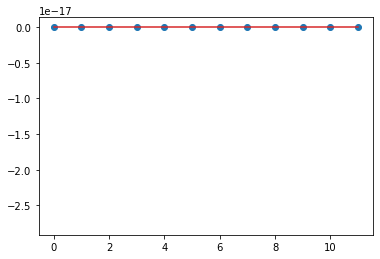

k =  1
[ 0.         -0.52361148 -1.04718485 -1.57079633 -2.0944078  -2.61798118
 -3.14159265  2.61798118  2.0944078   1.57079633  1.04718485  0.52361148]


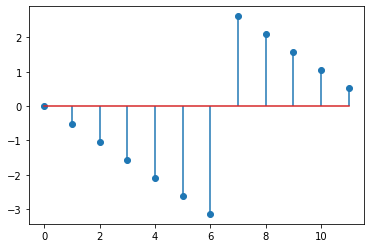

k =  2
[ 0.         -1.04718485 -2.0944078  -3.14159265  2.0944078   1.04718485
  0.         -1.04718485 -2.0944078  -3.14159265  2.0944078   1.04718485]


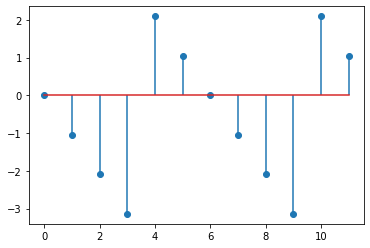

k =  3
[ 0.         -1.57079633 -3.14159265  1.57079633  0.         -1.57079633
 -3.14159265  1.57079633  0.         -1.57079633 -3.14159265  1.57079633]


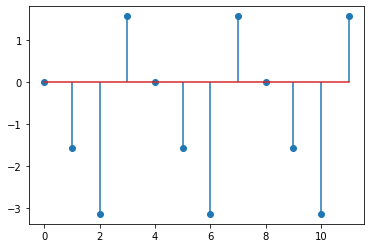

k =  4
[ 0.        -2.0944078  2.0944078  0.        -2.0944078  2.0944078
  0.        -2.0944078  2.0944078  0.        -2.0944078  2.0944078]


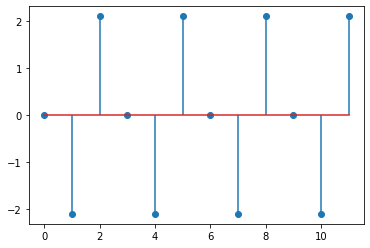

k =  5
[ 0.         -2.61798118  1.04718485 -1.57079633  2.0944078  -0.52361148
 -3.14159265  0.52361148 -2.0944078   1.57079633 -1.04718485  2.61798118]


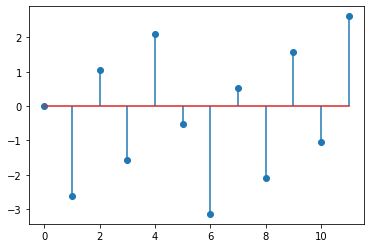

k =  6
[ 0.         -3.14159265  0.         -3.14159265  0.         -3.14159265
  0.         -3.14159265  0.         -3.14159265  0.          3.14159265]


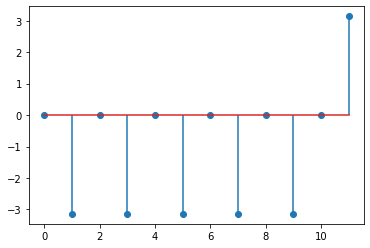

k =  7
[ 0.          2.61798118 -1.04718485  1.57079633 -2.0944078   0.52361148
 -3.14159265 -0.52361148  2.0944078  -1.57079633  1.04718485 -2.61798118]


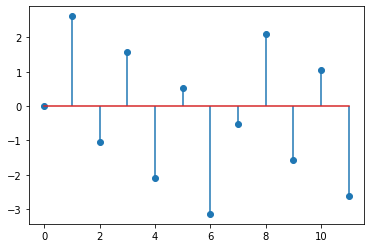

k =  8
[ 0.         2.0944078 -2.0944078  0.         2.0944078 -2.0944078
  0.         2.0944078 -2.0944078  0.         2.0944078 -2.0944078]


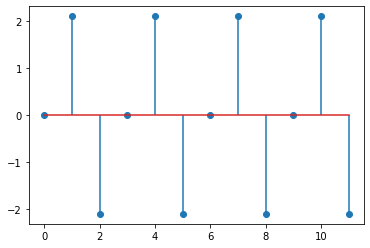

k =  9
[ 0.          1.57079633 -3.14159265 -1.57079633  0.          1.57079633
 -3.14159265 -1.57079633  0.          1.57079633  3.14159265 -1.57079633]


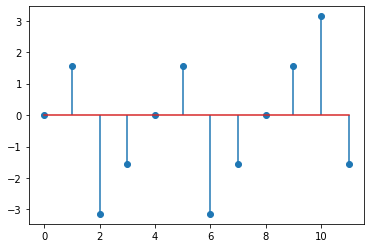

k =  10
[ 0.          1.04718485  2.0944078  -3.14159265 -2.0944078  -1.04718485
  0.          1.04718485  2.0944078   3.14159265 -2.0944078  -1.04718485]


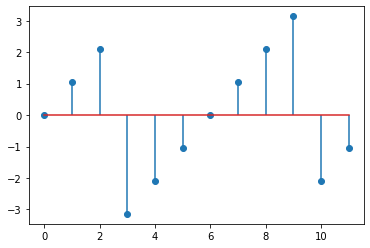

k =  11
[ 0.          0.52361148  1.04718485  1.57079633  2.0944078   2.61798118
 -3.14159265 -2.61798118 -2.0944078  -1.57079633 -1.04718485 -0.52361148]


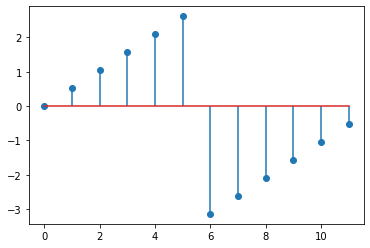

In [7]:
def q3():
    x=[1,1,0,0,0,0,0,0,0,0,0,0]
    X4, W4 = myMatrixDFT(x)
    
q3()

row k = 0 of W is the dc term. 

Row k = 1 is the first harmonic, the phasor rotates 1 cycle with N samples. 

Row k = 2 is the second harmonic, the phasor rotates 2 cycle for N samples.

## Question 4

N = 12


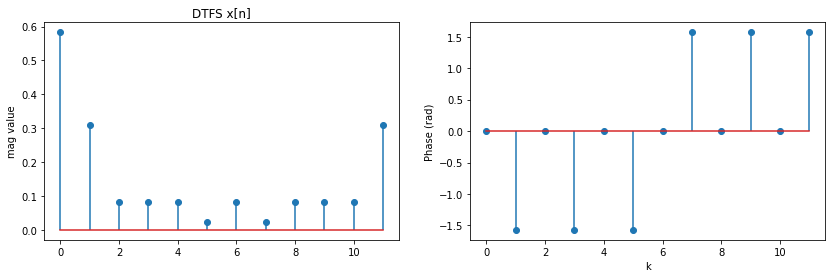

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
IDTFS: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
IDFT: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


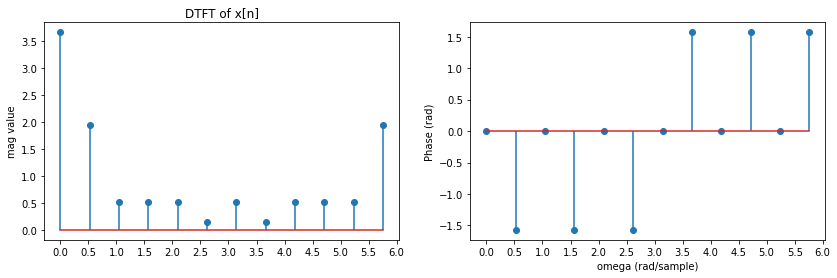

N = 24


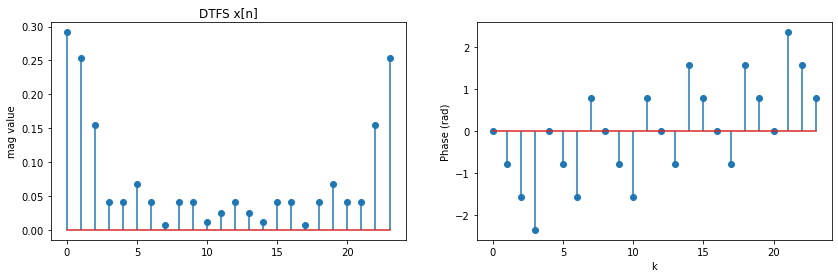

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDTFS: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDFT: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


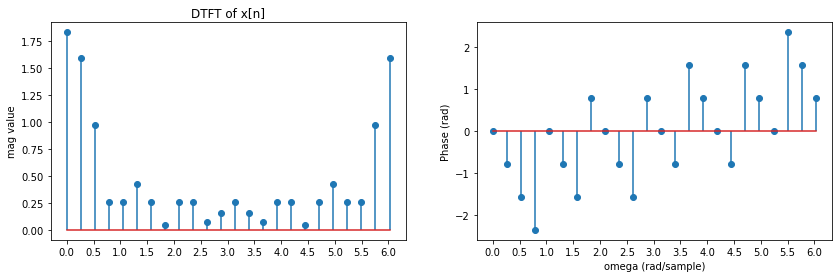

N = 48


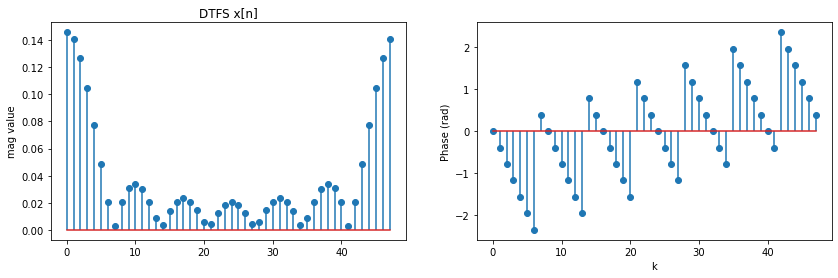

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDTFS: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDFT: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


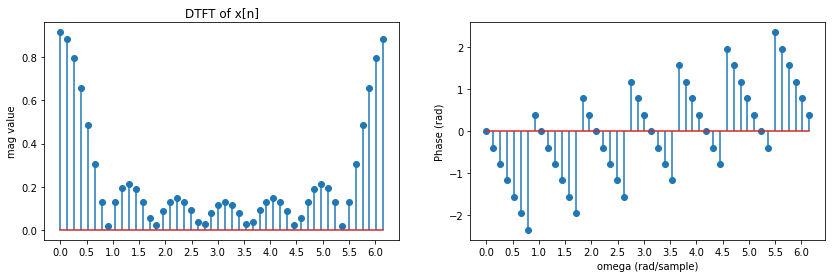

N = 96


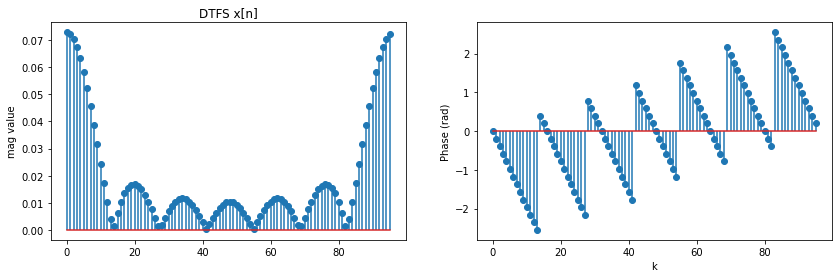

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDTFS: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
IDFT: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


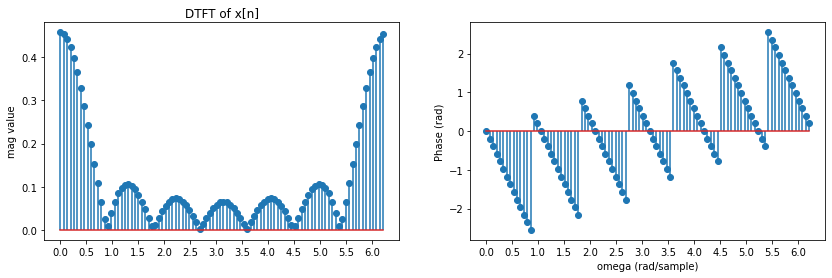

In [24]:
def q4_b():
    NList = [12, 24, 48, 96]
    for N in NList:
        print("N =", str(N))
        arr = np.zeros(N)
        arr[0:7]=1
        q1_b_c(arr, "dtfs,dtft")
        
q4_b()

DTFS is the scaled version and equally spaced samples of DTFT at $ \omega = k \omega_o $

## Question 5

In [42]:
def myDFTConvolve(ipX, impulseH):
    L = len(ipX)+len(impulseH)-1
    X1=np.zeros(L)
    X2=np.zeros(L)
    X1[0:len(ipX)]=ipX
    X2[0:len(impulseH)]=impulseH

    X1, _ = myDFT(X1)
    X2, _ = myDFT(X2)

    X3 = X1*X2
    
    y = myIDFT(X3)
    return np.round(y,5)

In [47]:
def q5():
    x = [1,1,1,0,0,0,0,0,0]
    h = [1,1,0,0]
    print("myDFTConvolve:")
    y = myDFTConvolve(x,h)
    print(y)
    print("Scipy fftconvolve:")
    print(np.round(signal.fftconvolve(x,h),5))
    
q5()

myDFTConvolve:
[1. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Scipy fftconvolve:
[ 1.  2.  2.  1. -0. -0. -0. -0. -0. -0.  0.  0.]
